In [3]:
from tools import *
import matplotlib.pyplot as plt
import tools
import ms
import os
import seaborn as sns
import numpy as np
import torch
import re
from tqdm import tqdm
import pandas as pd
from importlib import reload
import bio_helper
import sys
sys.path.append("..")
%load_ext autoreload
%autoreload 2
reload(bio_helper)


<module 'bio_helper' from '/home/gus/Desktop/ms_pred/figs/bio_helper.py'>

/home/gus/miniconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/gus/miniconda3/envs/torch/lib/python3.6/site-packages/seaborn/axisgrid.py:65: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(*args, **kwargs)
/home/gus/miniconda3/envs/torch/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


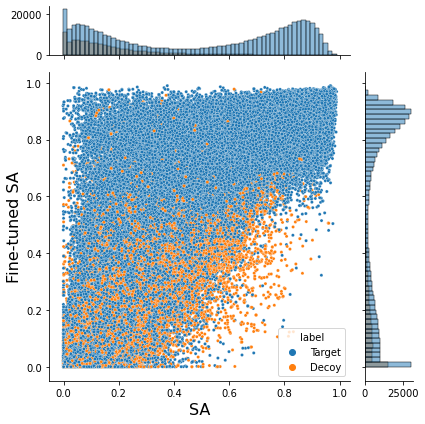

In [8]:
from matplotlib.ticker import MaxNLocator

frag_model = 'prosit_l1'

which = "lysc"
data2plot = {}
top_samples = -1
for which in [which]:
    result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"

    no_finetuned_dir = os.path.join(result_dir, "no_finetuned")
    sa_feat = pd.read_csv(os.path.join(
        no_finetuned_dir, "sa.tab"), sep='\t')[:top_samples]
    
    finetuned_dir = os.path.join(result_dir, "finetuned")
    sa_feat_f = pd.read_csv(os.path.join(
        finetuned_dir, "sa.tab"), sep='\t')[:top_samples]

    data2plot[which] = {
        "SA": sa_feat['spectral_angle'], "Fine-tuned SA": sa_feat_f['spectral_angle'], 
        "label": ["Decoy" if i < 0 else "Target" for i in sa_feat['Label']]}

import matplotlib as mpl
# plt.style.use(['ieee', "high-vis", 'no-latex'])
plt.rcParams["font.family"] = "DejaVu Sans"

joint_plot = pd.DataFrame(data2plot[which])
joint_plot['Fine-tuned SA'] = abs(joint_plot['Fine-tuned SA'])

g = sns.JointGrid(data=joint_plot, x="SA", y='Fine-tuned SA', hue='label', marginal_ticks=True)
g.plot_marginals(sns.histplot)
plt_g = g.plot_joint(sns.scatterplot, s=10)
# ax = sns.jointplot(x="SA", y='Fine-tuned SA',
#                    data=joint_plot, hue='label',marginal_ticks=True)

g.set_axis_labels('SA', 'Fine-tuned SA', fontsize=16)
# plt_g.ax_marg_y.set_ylabel("Intensity", fontsize=12)
# plt_g.ax_marg_y.spines['bottom'].set_visible(False)

plt.tight_layout()
g.savefig(f"fig/fig3-jointplot-{frag_model}-{which}.png",
            dpi=300, bbox_inches="tight")
# mpl.rcParams.update(mpl.rcParamsDefault)


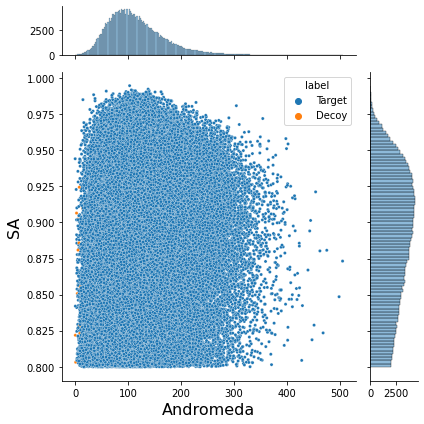

In [9]:
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

frag_model = 'prosit_l1'

which = "trypsin"
data2plot = {}
top_samples = -1
for which in [which]:
    result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"

    no_finetuned_dir = os.path.join(result_dir, "no_finetuned")
    sa_feat = pd.read_csv(os.path.join(
        no_finetuned_dir, "sa.tab"), sep='\t')[:top_samples]

    sa_feat_f = pd.read_csv(os.path.join(
        no_finetuned_dir, "andromeda.tab"), sep='\t')[:top_samples]

    data2plot[which] = {
        "SA": sa_feat['spectral_angle'], "Fine-tuned SA": sa_feat_f['andromeda'],
        "label": ["Decoy" if i < 0 else "Target" for i in sa_feat['Label']]}

# plt.style.use(['ieee', "high-vis", 'no-latex'])
plt.rcParams["font.family"] = "DejaVu Sans"

joint_plot = pd.DataFrame(data2plot[which])
joint_plot['Fine-tuned SA'] = abs(joint_plot['Fine-tuned SA'])

joint_plot = joint_plot[joint_plot['SA'] > 0.6]

g = sns.JointGrid(data=joint_plot, x="Fine-tuned SA", y='SA',
                  hue='label', marginal_ticks=True)
g.plot_marginals(sns.histplot)
plt_g = g.plot_joint(sns.scatterplot, s=10)
# ax = sns.jointplot(x="SA", y='Fine-tuned SA',
#                    data=joint_plot, hue='label',marginal_ticks=True)

g.set_axis_labels('Andromeda', "SA", fontsize=16)
# plt_g.ax_marg_y.set_ylabel("Intensity", fontsize=12)
# plt_g.ax_marg_y.spines['bottom'].set_visible(False)

plt.tight_layout()
# g.savefig(f"fig/fig3-jointplot-andromeda-{frag_model}-{which}.png",
#           dpi=300, bbox_inches="tight")
